In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Load dataset.
tracks = pd.read_csv('data/fma_metadata/tracks_processed_filled.csv')

#columns2drop = ['Unnamed: 0', 'track_id', 'artist_id']
columns2drop = ['Unnamed: 0', 'track_id', 'artist_id','track_date_recorded_daytime','album_date_released_daytime']

tracks.drop(columns2drop, inplace=True, axis=1)

tracks.shape

(106486, 38)

In [9]:
class_name = 'Attribution-NonCommercial-ShareAlike 3.0 International'

attributes = [col for col in tracks.columns if col != class_name]

X = tracks[attributes].values
y = tracks[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

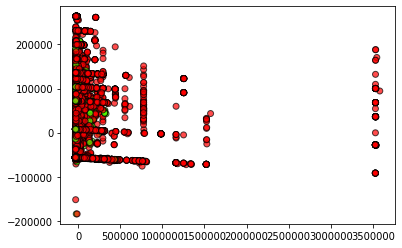

In [6]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [7]:
from sklearn.svm import LinearSVC

In [10]:
clf = LinearSVC(C=0.001,dual=False, random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8576861677152784
F1-score [0.9233066  0.01430894]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     18246
           1       0.96      0.01      0.01      3052

    accuracy                           0.86     21298
   macro avg       0.91      0.50      0.47     21298
weighted avg       0.87      0.86      0.79     21298



In [11]:
clf = LinearSVC(C=1.0,dual=False, random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8576861677152784
F1-score [0.9233066  0.01430894]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     18246
           1       0.96      0.01      0.01      3052

    accuracy                           0.86     21298
   macro avg       0.91      0.50      0.47     21298
weighted avg       0.87      0.86      0.79     21298



In [12]:
clf = LinearSVC(C=100.0,dual=False, random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8576861677152784
F1-score [0.9233066  0.01430894]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     18246
           1       0.96      0.01      0.01      3052

    accuracy                           0.86     21298
   macro avg       0.91      0.50      0.47     21298
weighted avg       0.87      0.86      0.79     21298



In [13]:
clf = LinearSVC(loss='hinge', C=0.01,class_weight='balanced', random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8071649920180298
F1-score [0.89282079 0.03974749]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     18246
           1       0.07      0.03      0.04      3052

    accuracy                           0.81     21298
   macro avg       0.46      0.48      0.47     21298
weighted avg       0.74      0.81      0.77     21298



C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [14]:
clf = LinearSVC(loss='hinge', C=1, random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8071649920180298
F1-score [0.89282079 0.03974749]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     18246
           1       0.07      0.03      0.04      3052

    accuracy                           0.81     21298
   macro avg       0.46      0.48      0.47     21298
weighted avg       0.74      0.81      0.77     21298



C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
clf = LinearSVC(loss='hinge',C=100, random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8071649920180298
F1-score [0.89282079 0.03974749]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     18246
           1       0.07      0.03      0.04      3052

    accuracy                           0.81     21298
   macro avg       0.46      0.48      0.47     21298
weighted avg       0.74      0.81      0.77     21298



C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [16]:
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train[support_vector_indices]

In [17]:
support_vectors_pca = pca.transform(support_vectors)

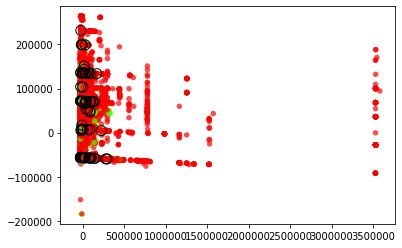

In [18]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(gamma='auto', C=0.01, random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
clf = SVC(gamma='auto', C=1, random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
clf = SVC(gamma='auto', C=100, random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
clf = SVC(gamma='auto', C=100, kernel='sigmoid', random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
clf.support_

In [ ]:
clf.support_vectors_[:10]

In [ ]:
clf.n_support_, len(X_train)

In [ ]:
from sklearn.svm import SVC
# fit the model
for kernel in ('linear', 'rbf', 'poly', 'sigmoid'):
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()